# Multi-Class Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

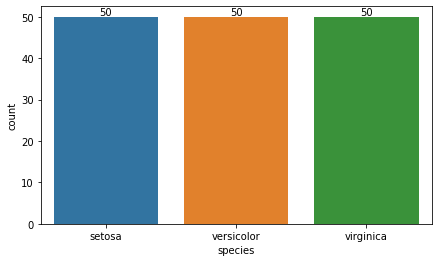

In [9]:
ax = sns.countplot(data = df, x ='species')
ax.bar_label(ax.containers[0]);

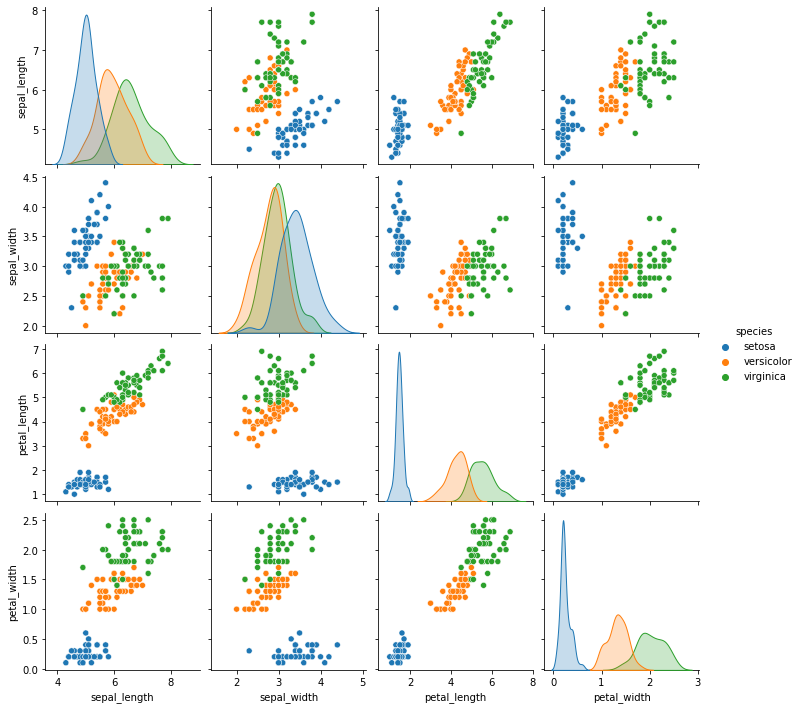

In [10]:
sns.pairplot(df,hue='species');

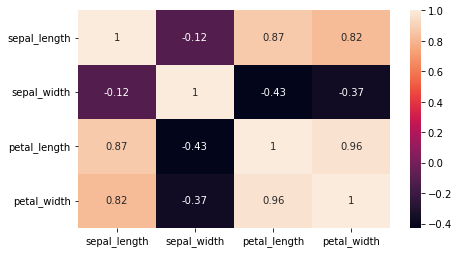

In [11]:
sns.heatmap(df.corr(),annot=True);

## Train | Test Split and Modeling

In [12]:
X = df.drop('species',axis=1)
y = df['species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# stratify=y is important especially in unbalanced dataset, you can also use for balanced datasets

In [16]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## Model Performance

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### With Default Parameters

In [18]:
y_pred = pipe_model.predict(X_test)
y_pred
# target can be numeric or categorical

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

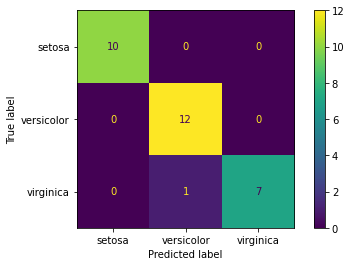

In [19]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [21]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [22]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# In multi-class data, we do not use precision, recall, and f1 metrics alone for CV or grid search CV. 
# We should use precision_weighted, precision_macro, precision_micro, etc., as shown above, otherwise, 
# you will get an error. Specifically, if we want to see CV scores for a single class, 
# we should use the make_scorer function as shown below.

test_accuracy               0.950000
train_accuracy              0.963889
test_precision_weighted     0.960000
train_precision_weighted    0.964076
test_recall_weighted        0.950000
train_recall_weighted       0.963889
test_f1_weighted            0.949206
train_f1_weighted           0.963872
dtype: float64

### Cross Validate for versicolar

In [23]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])


scoring = {"f1_versicolor":f1_versicolor, 
           "precision_versicolor":precision_versicolor,
           "recall_versicolor":recall_versicolor}

# In multi-class data, you can get CV scores based on your target label. 
# Again, we must use the make_scorer function. When the data is multi-class, the average and labels parameters
# must be specified in the make_scorer function

In [24]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# no overfiting

test_f1_versicolor            0.923810
train_f1_versicolor           0.942656
test_precision_versicolor     0.940000
train_precision_versicolor    0.949885
test_recall_versicolor        0.925000
train_recall_versicolor       0.935798
dtype: float64

## Class prediction

In [25]:
y_pred=pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

# In multi-class data, we do not search for a 0.5 threshold. 
# The prediction is assigned to the class with the highest probability

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
53,5.5,2.3,4.0,1.3,versicolor,versicolor,0.008192,0.886796,1.050119e-01
74,6.4,2.9,4.3,1.3,versicolor,versicolor,0.013558,0.904991,8.145015e-02
48,5.3,3.7,1.5,0.2,setosa,setosa,0.986904,0.013096,1.546878e-07
147,6.5,3.0,5.2,2.0,virginica,virginica,0.000733,0.160762,8.385049e-01
80,5.5,2.4,3.8,1.1,versicolor,versicolor,0.018558,0.948111,3.333184e-02
88,5.6,3.0,4.1,1.3,versicolor,versicolor,0.096310,0.846122,5.756797e-02
1,4.9,3.0,1.4,0.2,setosa,setosa,0.913848,0.086150,1.814027e-06
64,5.6,2.9,3.6,1.3,versicolor,versicolor,0.099521,0.865612,3.486680e-02
42,4.4,3.2,1.3,0.2,setosa,setosa,0.984541,0.015459,2.471313e-07
65,6.7,3.1,4.4,1.4,versicolor,versicolor,0.013994,0.874942,1.110645e-01


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
 
model = Pipeline(steps=operations)

In [27]:
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(max_iter=5000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(max_iter=5000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 5000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [28]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [29]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True) 
#scoring = f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"]) 

# In scoring classification data, the default metric is accuracy. If we specifically want to improve metrics 
# for a particular class, we should define the make_scorer function as the scoring parameter above.

# f we wanted the model to find the best parameters to improve the f1 score of the versicolor class:
# scoring = make_scorer(f1_score, average = None, labels =["versicolor"]) 

In [30]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [31]:
grid_model.best_params_

{'logistic__C': 19, 'logistic__penalty': 'l2'}

In [33]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=19, max_iter=5000))])

In [34]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score       0.975
mean_train_score    0.98125
Name: 11, dtype: object

In [35]:
y_pred = grid_model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

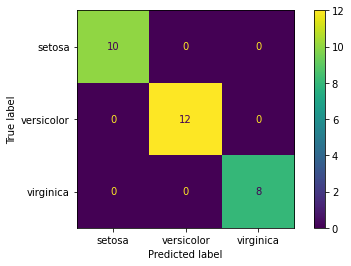

In [36]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [37]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [34]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [38]:
# RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

# PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

# RocCurveDisplay or PrecisionRecallDisplay don't work for multiclass data

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [39]:
# conda install -c conda-forge scikit-plot

In [40]:
# !pip install scikit-plot

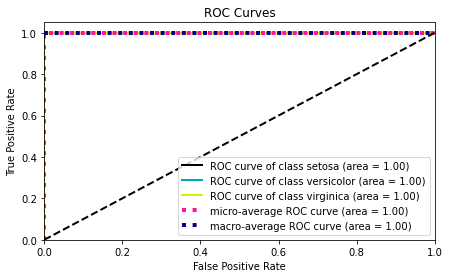

In [41]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [42]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values  # categorical to num

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])  # roc_auc score  for setosa

1.0

In [43]:
y_test[:5]

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
Name: species, dtype: object

In [44]:
y_test_dummies[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

## Precision Recall Curve

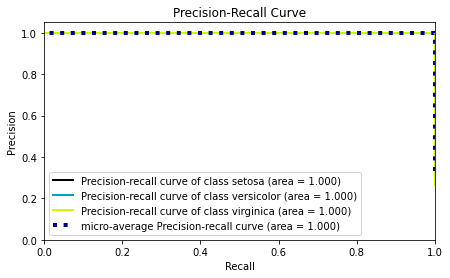

In [45]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [46]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

1.0

## Final Model and Model Deployment

In [47]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [48]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [49]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [50]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [51]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [52]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [53]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [54]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,setosa,0.712393,0.287603,0.000004
1,5.8,3.0,4.3,1.3,versicolor,0.044001,0.890134,0.065864
2,7.5,4.2,6.5,2.3,virginica,0.000085,0.020543,0.979372
